Part 1: K-Nearest-Neighbor (KNN) classification

First Import and prepare the data

In [28]:
import numpy as np
import pandas as pd
import math # used for the TFxIDF calculation

In [29]:
#cd OneDrive/Ross/CSC478/hw2/data/newsgroups/

In [30]:
# import the data sets
    # training and test data
train_data = np.genfromtxt('trainMatrixModified.txt',delimiter='\t')
test_data = np.genfromtxt('testMatrixModified.txt',delimiter='\t')
    # training and test targets
train_targets = np.genfromtxt('trainClasses.txt',delimiter='\t')
test_targets = np.genfromtxt('testClasses.txt',delimiter='\t')

    # omit the index from the targets
train_targets = train_targets[:,1]
test_targets = test_targets[:,1]

# transpose the data so that the documents are the rows
train_data = train_data.T
test_data = test_data.T


In [31]:
# normalize each attribute (term), these are now the columns

for i in range(0,train_data.shape[1]): # dor for each column (term)
    term = train_data[:,i]
    min_term = term.min()
    max_term = term.max()
    
    # normalize the training data
    norm_term = [(x-min_term)/(max_term-min_term) for x in term]
    train_data[:,i] = norm_term
    
    # normalize the test data with the same parameters
    term = test_data[:,i]
    norm_term = [(x-min_term)/(max_term-min_term) for x in term]
    test_data[:,i] = norm_term
    

a) Create your own KNN classifier.

In [32]:
def knn_search(x,D,L,K,measure):
    '''
    x: instance tobe  classified
    D: training data
    L: training labels
    K: nearest neighbors
    meausre: distance methodology
    '''
    
    if measure == 0:
        # euclidean distances
        dists = np.sqrt(((D-x)**2).sum(axis=1))
    elif measure == 1:
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        sims = np.dot(D,x)/(D_norm * x_norm)
        dists = 1 - sims
    idx = np.argsort(dists) # sorting
    
    # define an index for the top K matches
    match_index = idx[:K]
    
    # calculate the predicted class for the instance based on total distance for the class
    prediction_dict = {}
    for i in range(0,K):
        # populate a dictionary to keep the distances for each of the predicted values
        if L[match_index[i]] in prediction_dict:
            prediction_dict[L[match_index[i]]] = prediction_dict[L[match_index[i]]] + dists[match_index[i]]
        else:
            prediction_dict[L[match_index[i]]] = dists[match_index[i]]
    
    # determine the predicted value with the largest weight
    predicted_class = min(prediction_dict, key=prediction_dict.get)
    top_k_neighbors = D[match_index]
        
    # return the indexes of teh K nearest neighbors
    return predicted_class, top_k_neighbors

In [33]:
pclass, neighbors = knn_search(test_data[0], train_data,train_targets,5,1)

print 'The predicted class is: ', pclass
print 'The K nearest neighbors are:\n', neighbors


The predicted class is:  1.0
The K nearest neighbors are:
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


b) Create a function to compute the classification accuracy over the test data set

In [34]:
def test_accuracy(t,D,L,T,K,measure):
    '''
    t: test data 
    D: training data
    L: training targets
    T: test targets
    K: nearest neighbors
    meausre: distance methodology
    '''
    
    correct_answers = 0
    for i in range(0,t.shape[0]): # perform for each document (row) in the test data
        predicted_class = knn_search(t[i],D,L,K,measure)[0]
        actual_class = T[i]
        if predicted_class == actual_class:
            correct_answers = correct_answers + 1

    return correct_answers * 1.0 / t.shape[0]*1.0 # correct answers divided by total test intances


c) Run your accuracy function on a range of values for K in order to compare accuracy values for different numbers of neighbors. Do this both using Euclidean Distance as well as Cosine similarity measure.

In [35]:
print 'Euclidean Distance Analysis:\n\n'
K = 1
while K < 21:
    accuracy = test_accuracy(test_data,train_data,train_targets,test_targets,K,0)
    print 'Accuracy with %s neighbors: %s\n' % (K,accuracy)
    K = K + 1

print '\n\nCosine Similarity Measure:\n\n'
K = 1
while K < 21:
    accuracy = test_accuracy(test_data,train_data,train_targets,test_targets,K,1)
    print 'Accuracy with %s neighbors: %s\n' % (K,accuracy)
    K = K + 1
    

Euclidean Distance Analysis:


Accuracy with 1 neighbors: 0.705

Accuracy with 2 neighbors: 0.705

Accuracy with 3 neighbors: 0.485

Accuracy with 4 neighbors: 0.505

Accuracy with 5 neighbors: 0.455

Accuracy with 6 neighbors: 0.48

Accuracy with 7 neighbors: 0.46

Accuracy with 8 neighbors: 0.485

Accuracy with 9 neighbors: 0.475

Accuracy with 10 neighbors: 0.49

Accuracy with 11 neighbors: 0.485

Accuracy with 12 neighbors: 0.495

Accuracy with 13 neighbors: 0.475

Accuracy with 14 neighbors: 0.485

Accuracy with 15 neighbors: 0.485

Accuracy with 16 neighbors: 0.48

Accuracy with 17 neighbors: 0.48

Accuracy with 18 neighbors: 0.495

Accuracy with 19 neighbors: 0.5

Accuracy with 20 neighbors: 0.5



Cosine Similarity Measure:


Accuracy with 1 neighbors: 0.95

Accuracy with 2 neighbors: 0.95

Accuracy with 3 neighbors: 0.84

Accuracy with 4 neighbors: 0.765

Accuracy with 5 neighbors: 0.685

Accuracy with 6 neighbors: 0.595

Accuracy with 7 neighbors: 0.56

Accuracy with 8 neighb

d) Using Python, modify the training and test data sets so that term weights are converted to TFxIDF weights (instead of raw term frequencies)

In [36]:
# reload the data
train_data = np.genfromtxt('trainMatrixModified.txt',delimiter='\t')
test_data = np.genfromtxt('testMatrixModified.txt',delimiter='\t')

# first create an array with the count of docs that contain each term
    # train
train_data_hold = train_data
term_found = train_data_hold<>0
train_data_hold[term_found] = 1
train_term_freq_array = train_data_hold.sum(axis=1) # sum across the documents (columns) for each row (term)

    # test
test_data_hold = test_data
term_found = test_data_hold<>0
test_data_hold[term_found] = 1
test_term_freq_array = test_data_hold.sum(axis=1) # sum across the documents (columns) for each row (term)

In [37]:
# transform the training and test data for TFxIDF
    # training
for i in range(0,train_data.shape[0]): # rows
        for j in range(0,train_data.shape[1]): # columns
            train_data[i,j] = train_data[i,j] * math.log((train_data.shape[1]/train_term_freq_array[i]),2)
    # test
for i in range(0,test_data.shape[0]): # rows
        for j in range(0,test_data.shape[1]): # columns
            # note that the training data is again used as the IDF portion to transform the test data
            test_data[i,j] = test_data[i,j] * math.log((train_data.shape[1]/train_term_freq_array[i]),2) 
            
# transpose the data so that the documents are the rows
train_data = train_data.T
test_data = test_data.T

d) Continued ... Then, rerun your evaluation on the range of K values (as above) and compare the results to the results without using TFxIDF weights.

In [38]:
print 'Euclidean Distance Analysis:\n\n'
K = 1
while K < 21:
    accuracy = test_accuracy(test_data,train_data,train_targets,test_targets,K,0)
    print 'Accuracy with %s neighbors: %s\n' % (K,accuracy)
    K = K + 1

print '\n\nCosine Similarity Measure:\n\n'
K = 1
while K < 21:
    accuracy = test_accuracy(test_data,train_data,train_targets,test_targets,K,1)
    print 'Accuracy with %s neighbors: %s\n' % (K,accuracy)
    K = K + 1

Euclidean Distance Analysis:


Accuracy with 1 neighbors: 0.635

Accuracy with 2 neighbors: 0.635

Accuracy with 3 neighbors: 0.405

Accuracy with 4 neighbors: 0.485

Accuracy with 5 neighbors: 0.445

Accuracy with 6 neighbors: 0.485

Accuracy with 7 neighbors: 0.485

Accuracy with 8 neighbors: 0.46

Accuracy with 9 neighbors: 0.445

Accuracy with 10 neighbors: 0.49

Accuracy with 11 neighbors: 0.495

Accuracy with 12 neighbors: 0.5

Accuracy with 13 neighbors: 0.505

Accuracy with 14 neighbors: 0.505

Accuracy with 15 neighbors: 0.505

Accuracy with 16 neighbors: 0.505

Accuracy with 17 neighbors: 0.505

Accuracy with 18 neighbors: 0.505

Accuracy with 19 neighbors: 0.51

Accuracy with 20 neighbors: 0.505



Cosine Similarity Measure:


Accuracy with 1 neighbors: 0.985

Accuracy with 2 neighbors: 0.985

Accuracy with 3 neighbors: 0.94

Accuracy with 4 neighbors: 0.91

Accuracy with 5 neighbors: 0.875

Accuracy with 6 neighbors: 0.83

Accuracy with 7 neighbors: 0.81

Accuracy with 8 ne

<b /b>
As expected, we see an improve on categorization accuracy when we use a cosine similarity measures on the data that has been transformed with TFxIDF weights.

The cosine similarity measure works well with text classification because it does not reward the 0-0 "match" if the term is found in neither document.  The TFxIDF transformation because it helps to counter the "zipf" distribution by giving higher weights to words that are more rare across the document set.

In [39]:
def rocchio_train(TD,TT):
    '''
    TD: training data
    TT: training targets
    '''
    
    # create indecies for the windows and hockey categories
    windows_mask = TT==0
    # split the training data by category
    train_windows = TD[windows_mask]
    
    hockey_mask = TT==1
    train_hockey = TD[hockey_mask]
    
    # sum the frequencies across all the documents for each term
    c0_prototype = train_windows.sum(axis=0) # sum the counts of each term down each column (term)
    c1_prototype = train_hockey.sum(axis=0)
    
    # now, both prototype vectors are the same size (5500L,)

    return c0_prototype, c1_prototype

In [40]:
def rocchio_classify(x,P):
    '''
    x: instance to be classified
    P: dictionary of prototype vectors where the class is the key
    '''
    m = -2 # initialize maximum cosSim
    for c in P: # perform for each prototype vector passed
        D = P[c]
        D_norm = np.linalg.norm(D)
        x_norm = np.linalg.norm(x)
        sims = np.dot(D,x)/(D_norm * x_norm)
        if sims > m:
            m = sims
            predicted_class = c
        
    # return the predicted class and the similarity of the test intance to the prototype vector of the predicted class
    return predicted_class, P[predicted_class]

In [41]:
# define a dictionary for the prototype vectors
prototype_dict = {}
c0_prototype, c1_prototype = rocchio_train(train_data,train_targets) # input has been converted to TFIDF and is D(row)T(col)
prototype_dict[0] = c0_prototype
prototype_dict[1] = c1_prototype

predicted_class, sims = rocchio_classify(test_data[0],prototype_dict)
print predicted_class
print sims

1
[ 96.          34.18250634  44.25349666 ...,   8.64385619   0.           0.        ]


In [42]:
def test_accuracy_rocchio(t,T,P):
    '''
    t: test data 
    T: test targets
    P: prototype dictionary
    '''
    
    correct_answers = 0
    for i in range(0,t.shape[0]): # perform for each document (row) in the test data
        predicted_class = rocchio_classify(t[i],P)[0]
        actual_class = T[i]
        if predicted_class == actual_class:
            correct_answers = correct_answers + 1

    return correct_answers * 1.0 / t.shape[0]*1.0 # correct answers divided by total test intances

d) continued .. 

Finally, compute the classification accuracy using the test instances and compare your results to the best KNN approach you tried earlier.

In [43]:
# define a dictionary for the prototype vectors
prototype_dict = {}
c0_prototype, c1_prototype = rocchio_train(train_data,train_targets) # input has been converted to TFIDF and is D(row)T(col)
prototype_dict[0] = c0_prototype
prototype_dict[1] = c1_prototype

# determine the accuracy of the Rocchio method
rocchio_accuracy = test_accuracy_rocchio(test_data,test_targets,prototype_dict)
print rocchio_accuracy

0.99


<b Comparison between Roccihio and k nearest neighbor methods /b>

Our best performance with the KNN approach was after we translated the data to TFxIDF and include one or two neighbors -- this performance was just shy of 99%

With the Roccihio method, we see also see an accuracy of 99% which is consistent with the best performance among our KNN models.

Part 2: Classification using scikit-learn 

a) Load and preprocess the data using Numpy or Pandas and the preprocessing functions from scikit-learn. 

In [44]:
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
# load the data
bank = pd.read_csv("bank_data.csv", index_col=0)

# convert the data to standard spreadsheet format 
std_bank = pd.get_dummies(bank)
# define the pep_NO attribute as the target
std_bank_targets = std_bank.pep_NO
# delete the pep_YES and pep_NO columns from the dataset
std_bank = std_bank.drop('pep_YES', 1) # 0 for rows and 1 for columns
std_bank = std_bank.drop('pep_NO', 1) 

# split the data into randomized 80% 20% training and test split
bank_train, bank_test, bank_target_train, bank_target_test = train_test_split(std_bank, std_bank_targets, test_size=0.2, random_state=33)

b) Run scikit-learn's KNN classifier on the test set. 

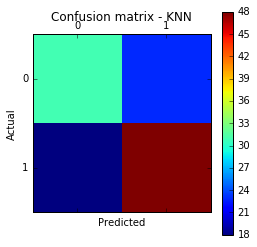

Classification Report KNN: 
             precision    recall  f1-score   support

        0.0       0.63      0.57      0.60        54
        1.0       0.68      0.73      0.70        66

avg / total       0.66      0.66      0.66       120

Average Accuracy Score - KNN - Train Set:  1.0
Average Accuracy Score - KNN - Test Set:  0.658333333333


In [46]:
# must first normalize the data on a 0-1 scale (based on the training data)
min_max_scaler = preprocessing.MinMaxScaler().fit(bank_train)
bank_train_norm = min_max_scaler.transform(bank_train)
bank_test_norm = min_max_scaler.transform(bank_test)

# now run the knn classifier
n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(bank_train_norm, bank_target_train)

knnpreds_test = knnclf.predict(bank_test_norm)

# generate the confusion matrix
knncm = (confusion_matrix(bank_target_test, knnpreds_test))

# visualize the confusion matrix
plt.matshow(knncm)
plt.title('Confusion matrix - KNN')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# generate the classification report
print 'Classification Report KNN: \n', classification_report(bank_target_test, knnpreds_test)

# compute the average accuracy score
print 'Average Accuracy Score - KNN - Train Set: ', knnclf.score(bank_train_norm, bank_target_train)
print 'Average Accuracy Score - KNN - Test Set: ', knnclf.score(bank_test_norm, bank_target_test)


b) continued .. Experiment with different values of K and the weight parameter for KNN

In [47]:
# Experiment with different values of K and the weight parameter for KNN 
print 'Varying K with weights=distance\n'
for n in range(1,11):
    knnclf = neighbors.KNeighborsClassifier(n, weights='distance')
    knnclf.fit(bank_train_norm, bank_target_train)
    print 'accuracy k = ' + str(n) + ' weight = distance: ', knnclf.score(bank_test_norm, bank_target_test)
    
print '\nVarying K with weights=uniform\n'
for n in range(1,11):
    knnclf = neighbors.KNeighborsClassifier(n, weights='uniform')
    knnclf.fit(bank_train_norm, bank_target_train)
    print 'accuracy k = ' + str(n) + ' weight = uniform: ', knnclf.score(bank_test_norm, bank_target_test)

Varying K with weights=distance

accuracy k = 1 weight = distance:  0.633333333333
accuracy k = 2 weight = distance:  0.633333333333
accuracy k = 3 weight = distance:  0.641666666667
accuracy k = 4 weight = distance:  0.641666666667
accuracy k = 5 weight = distance:  0.658333333333
accuracy k = 6 weight = distance:  0.65
accuracy k = 7 weight = distance:  0.65
accuracy k = 8 weight = distance:  0.633333333333
accuracy k = 9 weight = distance:  0.65
accuracy k = 10 weight = distance:  0.65

Varying K with weights=uniform

accuracy k = 1 weight = uniform:  0.633333333333
accuracy k = 2 weight = uniform:  0.583333333333
accuracy k = 3 weight = uniform:  0.658333333333
accuracy k = 4 weight = uniform:  0.575
accuracy k = 5 weight = uniform:  0.666666666667
accuracy k = 6 weight = uniform:  0.583333333333
accuracy k = 7 weight = uniform:  0.65
accuracy k = 8 weight = uniform:  0.633333333333
accuracy k = 9 weight = uniform:  0.675
accuracy k = 10 weight = uniform:  0.608333333333


<b /b>
From my brief experiments, the best accuracy I found was 67.5% which came from using 9 nearest neighbors and uniform weights

c) Repeat the classification using scikit-learn's decision tree classifier 

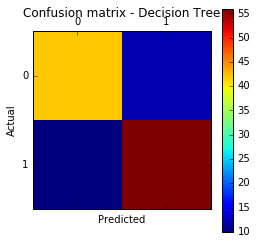

Classification Report - Decision Tree: 
             precision    recall  f1-score   support

        0.0       0.81      0.78      0.79        54
        1.0       0.82      0.85      0.84        66

avg / total       0.82      0.82      0.82       120

Average Accuracy Score - Decision Tree - Train Set:  0.710416666667
Average Accuracy Score - Decision Tree - Test Set:  0.691666666667


In [48]:
from sklearn import tree

# create a decision tree object
treeclf = tree.DecisionTreeClassifier(criterion='entropy')

# fit the model to our training data
treeclf = treeclf.fit(bank_train, bank_target_train) # 

# make predictions about the test data
treepreds_test = treeclf.predict(bank_test)

# genderate confusion matrix
treecm = (confusion_matrix(bank_target_test, treepreds_test))

# visualize the confusion matrix
plt.matshow(treecm)
plt.title('Confusion matrix - Decision Tree')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# generate the classification report
print 'Classification Report - Decision Tree: \n', classification_report(bank_target_test, treepreds_test)

# compute the average accuracy score
print 'Average Accuracy Score - Decision Tree - Train Set: ', treeclf.score(bank_train_norm, bank_target_train)
print 'Average Accuracy Score - Decision Tree - Test Set: ', treeclf.score(bank_test_norm, bank_target_test)

c) continued ... and the naive Bayes (Gaussian) classifier

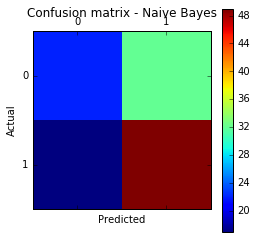

Classification Report - Decision Tree: 
             precision    recall  f1-score   support

        0.0       0.56      0.41      0.47        54
        1.0       0.60      0.74      0.67        66

avg / total       0.59      0.59      0.58       120

Average Accuracy Score - Naive Bayes - Train Set:  0.5375
Average Accuracy Score - Naive Bayes - Test Set:  0.55


In [49]:
from sklearn import naive_bayes

nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(bank_train, bank_target_train)
nbpreds_test = nbclf.predict(bank_test)

# genderate confusion matrix
nbcm = (confusion_matrix(bank_target_test, nbpreds_test))

# visualize the confusion matrix
plt.matshow(nbcm)
plt.title('Confusion matrix - Naive Bayes')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# generate the classification report
print 'Classification Report - Decision Tree: \n', classification_report(bank_target_test, nbpreds_test)

# compute the average accuracy score
print 'Average Accuracy Score - Naive Bayes - Train Set: ', nbclf.score(bank_train_norm, bank_target_train)
print 'Average Accuracy Score - Naive Bayes - Test Set: ', nbclf.score(bank_test_norm, bank_target_test)

<b />
In all cases except our Naive Bayes classifier, the accuracy on the training set is higher than the accuracy on our test set.  This suggests over fitting to the training set

d) Discuss your observations based on the above experiments.

<b />
Overall, the best performing classfier for the test data was the decision tree at 69% accuracy on the training set.  This model also had the smallest discrepancy between accuracy on the training set and accuracy on the test set.

Our worst performing model on the training set was our Naive Bayes classifier at only 55% accuracy on the test set.  I'm franky not entirely sure why the performance of this model was so poor but will be interested to learn more about the implications in class.

Part 3: Data Analysis and Predictive Modeling on Census data

a) Preprocessing and data analysis

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

# load the data, replacing missing values (?) with NaN
census = pd.read_csv("adult-modified.csv", na_values=["?"]) 
# rename column headers to remove the '-' character
census.columns = ['age', 'workclass', 'education', 'marital_status', 'race', 'sex','hours_per_week', 'income']

# In the case of numeric attributes, impute and fill-in the missing values using the attribute mean
    # age
age_mean = census.age.mean()
census.age.fillna(age_mean, axis=0, inplace=True)
    # education
edu_mean = census.education.mean()
census.education.fillna(edu_mean, axis=0, inplace=True)
    # age
age_mean = census.age.mean()
census.age.fillna(age_mean, axis=0, inplace=True)
    # hours_per_week
hpw_mean = census.hours_per_week.mean()
census.hours_per_week.fillna(hpw_mean, axis=0, inplace=True)

# In case of categorical attributes, remove instances with missing values. 
# Note that only missing values left are categorical
census.dropna(axis=0, inplace=True)

a) continued ... Examine the characteristics of the attributes, including relevant statistics for each attribute, histograms illustrating the distribtions of numeric attributes, bar graphs showing value counts for categorical attributes, etc.

In [51]:
# generally describe the statistics of the numerical attributes
print census.describe()

               age    education  hours_per_week
count  9412.000000  9412.000000     9412.000000
mean     38.366342    10.125266       41.080217
std      12.962039     2.542118       11.884590
min      17.000000     1.000000        1.000000
25%      28.000000     9.000000       40.000000
50%      37.000000    10.000000       40.000000
75%      47.000000    13.000000       45.000000
max      90.000000    16.000000       99.000000


(array([  165.,   546.,   634.,  5145.,   950.,  1172.,   567.,   137.,
           64.,    32.]),
 array([  1. ,  10.8,  20.6,  30.4,  40.2,  50. ,  59.8,  69.6,  79.4,
         89.2,  99. ]),
 <a list of 10 Patch objects>)

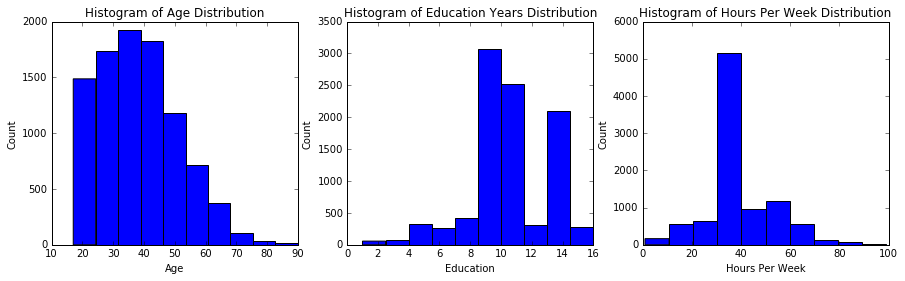

In [52]:
# generate histograms to describe the distrubution of numerical attributes
fig = plt.figure(figsize=(15,4))
    # age
ax1 = fig.add_subplot(131)
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')
ax1.set_title('Histogram of Age Distribution')
plt.hist(census.age)
    # edcuation
ax2 = fig.add_subplot(132)
ax2.set_xlabel('Education')
ax2.set_ylabel('Count')
ax2.set_title('Histogram of Education Years Distribution')
plt.hist(census.education)
    # hours_per_week
ax3 = fig.add_subplot(133)
ax3.set_xlabel('Hours Per Week')
ax3.set_ylabel('Count')
ax3.set_title('Histogram of Hours Per Week Distribution')
plt.hist(census.hours_per_week)

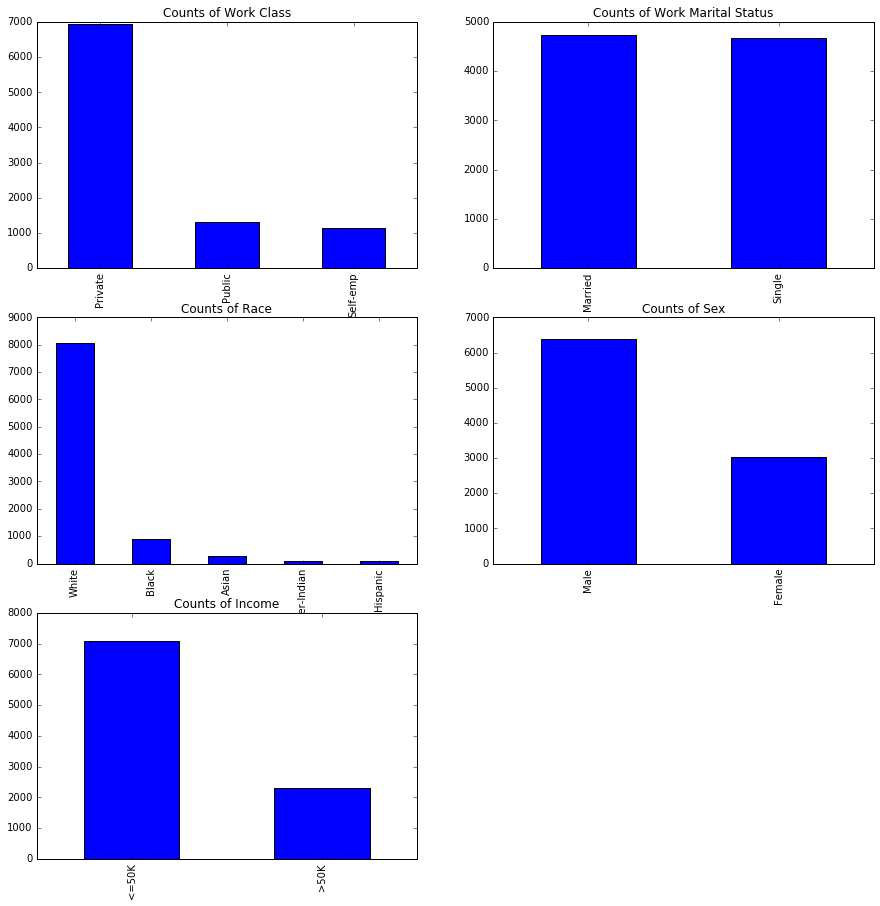

In [53]:
# generate bar graphs showing value counts for categorical attributes
fig = plt.figure(figsize=(15,15))
# workclass
ax1 = fig.add_subplot(321)
census.workclass.value_counts().plot(kind='bar',title='Counts of Work Class')
# marital_status
ax2 = fig.add_subplot(322)
census.marital_status.value_counts().plot(kind='bar',title='Counts of Work Marital Status')
# race
ax3 = fig.add_subplot(323)
census.race.value_counts().plot(kind='bar',title='Counts of Race')
# sex
ax4 = fig.add_subplot(324)
census.sex.value_counts().plot(kind='bar',title='Counts of Sex')
# income
ax5 = fig.add_subplot(325)
census.income.value_counts().plot(kind='bar',title='Counts of Income')

a) continued .. Perform the following cross-tabulations (including generating bar charts): education+race, work-class+income, work-class+race, and race+income

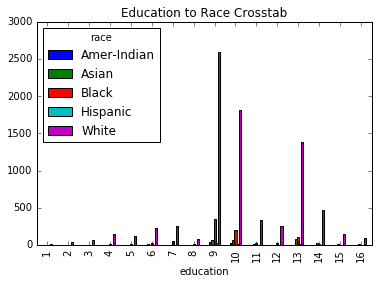

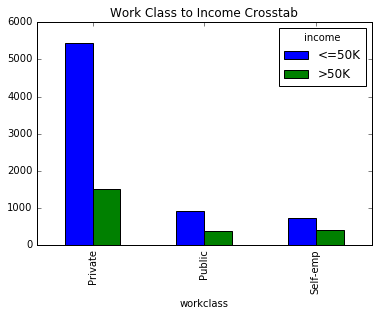

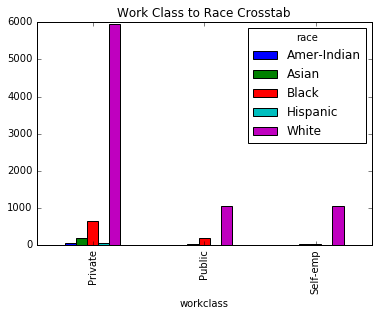

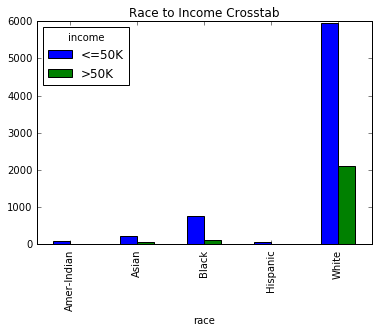

In [54]:
    # education race
pd.crosstab(census.education, census.race).plot(kind='bar',title='Education to Race Crosstab')
    # workclass - income
pd.crosstab(census.workclass, census.income).plot(kind='bar',title='Work Class to Income Crosstab')
    # workclass - race
pd.crosstab(census.workclass, census.race).plot(kind='bar',title='Work Class to Race Crosstab')
    # race-income
pd.crosstab(census.race, census.income).plot(kind='bar',title='Race to Income Crosstab')


a) continued .. In the latter case (race+income) also create a table or chart showing percentages of each race category that fall in the low-income group.

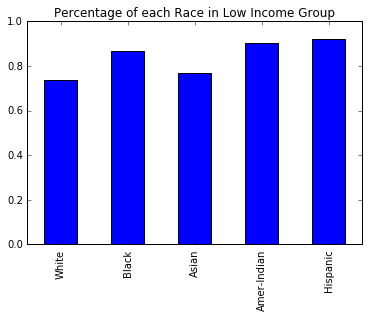

In [55]:
all_race = census.race.value_counts()
low_race = census[census.income == '<=50K'].race.value_counts()
(low_race / all_race).plot(kind='bar',title='Percentage of each Race in Low Income Group')

<b /b>
Overall, we see that a large percentage of respondents from each category fall into the low income category.  The race group with the lowest percentage of low income respondents is "White," while the race group with the largest percentage of low income respondents is "Hispanic."

a) continued .. Compare and contrast the characteristics of the low-income and high-income categories across the different attributes. 

In [56]:
# for this section we're going to split the census data into two groups -- one low one high -- and then perform the same
# we did above on each group to compare their characteristics

# split the census
census_low = census[census.income == '<=50K']
census_high = census[census.income == '>50K']

# calculate the numerical attributes
print 'Low income numerical attributes:\n', census_low.describe()
print '\nHigh income numerical attributes:\n', census_high.describe()

Low income numerical attributes:
               age    education  hours_per_week
count  7093.000000  7093.000000     7093.000000
mean     36.644604     9.646976       39.567038
std      13.340142     2.397358       11.868506
min      17.000000     1.000000        1.000000
25%      26.000000     9.000000       38.000000
50%      35.000000     9.000000       40.000000
75%      45.000000    10.000000       40.000000
max      90.000000    16.000000       99.000000

High income numerical attributes:
               age    education  hours_per_week
count  2319.000000  2319.000000     2319.000000
mean     43.632531    11.588185       45.708495
std      10.042135     2.410764       10.678794
min      19.000000     2.000000        1.000000
25%      36.000000     9.000000       40.000000
50%      43.000000    12.000000       40.000000
75%      50.000000    13.000000       50.000000
max      90.000000    16.000000       99.000000


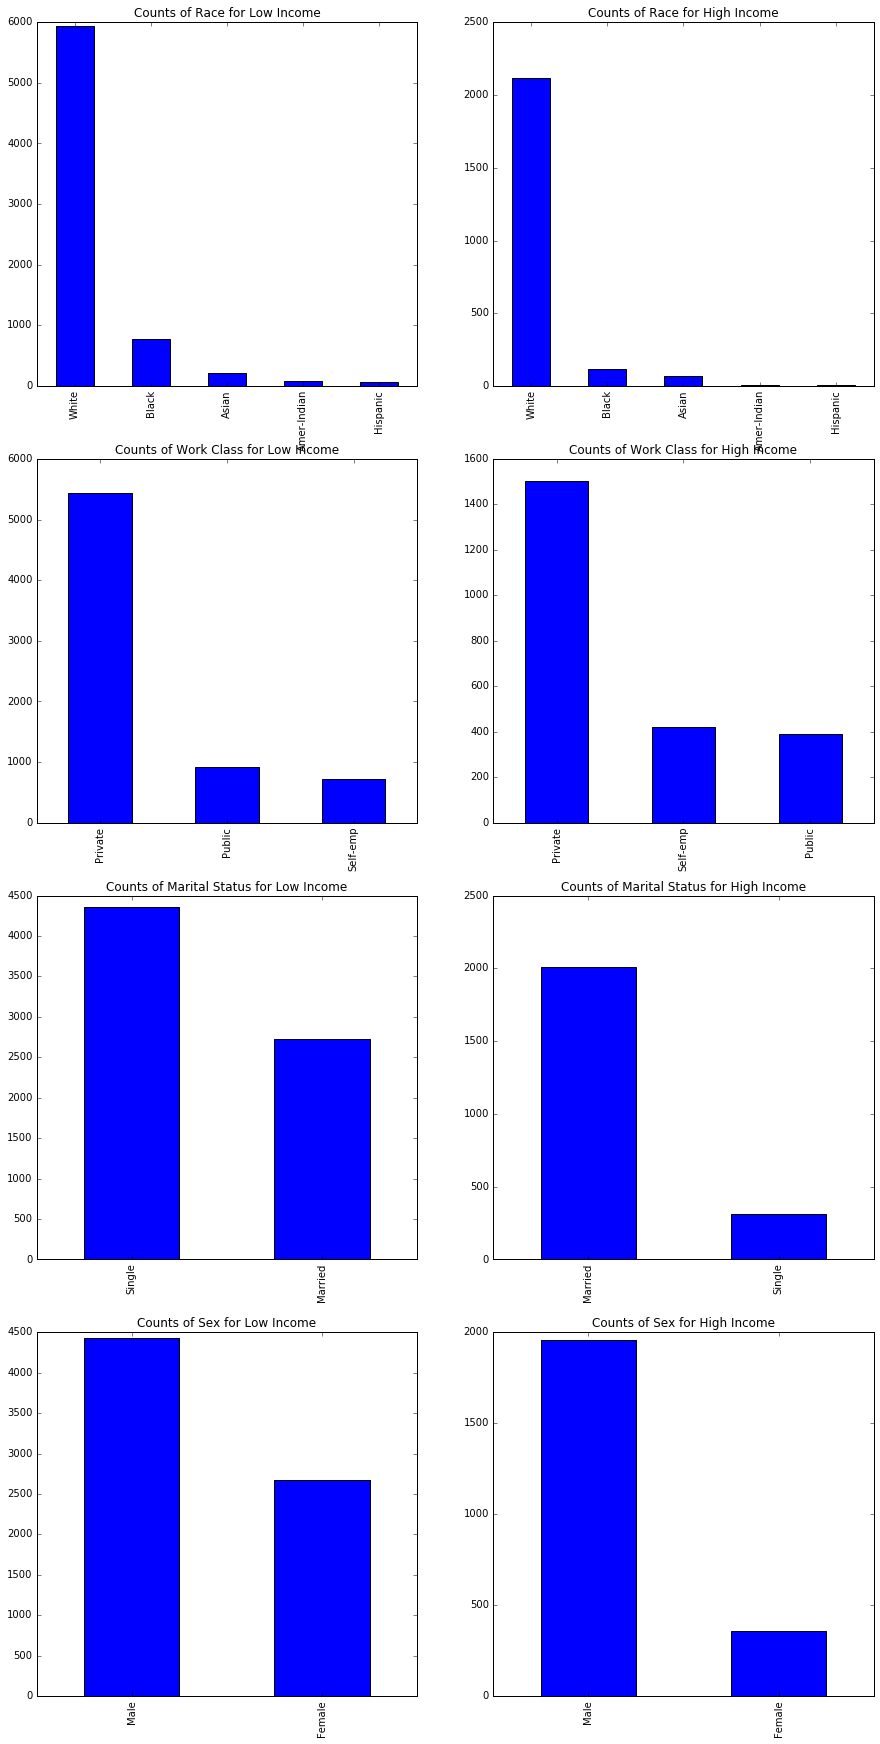

In [57]:
# generate bar charts to compare distributions of the categorical attributes cross low and high incomes
low_income_race = census_low.race.value_counts()
high_income_race = census_high.race.value_counts()

low_income_workclass = census_low.workclass.value_counts()
high_income_workclass = census_high.workclass.value_counts()

low_income_marital_status = census_low.marital_status.value_counts()
high_income_marital_status = census_high.marital_status.value_counts()

low_income_sex = census_low.sex.value_counts()
high_income_sex = census_high.sex.value_counts()


fig = plt.figure(figsize=(15,30))
# race
ax1 = fig.add_subplot(421)
low_income_race.plot(kind='bar',title='Counts of Race for Low Income')
ax2 = fig.add_subplot(422)
high_income_race.plot(kind='bar',title='Counts of Race for High Income')

# workclass
ax3 = fig.add_subplot(423)
low_income_workclass.plot(kind='bar',title='Counts of Work Class for Low Income')
ax4 = fig.add_subplot(424)
high_income_workclass.plot(kind='bar',title='Counts of Work Class for High Income')

# marital_status
ax5 = fig.add_subplot(425)
low_income_marital_status.plot(kind='bar',title='Counts of Marital Status for Low Income')
ax6 = fig.add_subplot(426)
high_income_marital_status.plot(kind='bar',title='Counts of Marital Status for High Income')

# sex
ax7 = fig.add_subplot(427)
low_income_sex.plot(kind='bar',title='Counts of Sex for Low Income')
ax8 = fig.add_subplot(428)
high_income_sex.plot(kind='bar',title='Counts of Sex for High Income')

<b /b>
If look strictly at the numerical attributes, we can see that the higher income respondents are on average older, more educated, and work more hours per week.  These attributes can perhaps be expected for higher earning individuals.

For the categorical attributes, it's helpful to look at the distribution of each across the high and low earning groups.  Here, there doesn't appear to be a significant difference in this distribution across race.  However, it does appear that the higher income workers are more concentrated in the self-emplyed and public working classes than the higher income respondents.

Similarly, higher income respondents appear to be more likely to be single that single.  Finally, we see that the distribution of sexes is more heavily geard toward females in the lower earning group 

b) Predictive Modeling and Model Evaluation

In [58]:
from sklearn import naive_bayes
from sklearn import cross_validation
from sklearn.lda import LDA

# convert the data to a standard spreadsheet format
census_std = pd.get_dummies(census)
# define the target attribute (high income)
census_target = census_std['income_>50K'] 
# drop income attributes from the data set
census_std = census_std.drop('income_<=50K', 1) # 0 for rows and 1 for columns
census_std = census_std.drop('income_>50K', 1)

# define the models
nbclf = naive_bayes.GaussianNB()
treeclf = tree.DecisionTreeClassifier(criterion='entropy')
ldclf = LDA()

# define the scores
cv_nb_scores = cross_validation.cross_val_score(nbclf, census_std, census_target, cv=10)
cv_tree_scores = cross_validation.cross_val_score(treeclf, census_std, census_target, cv=10)
cv_ld_scores = cross_validation.cross_val_score(ldclf, census_std, census_target, cv=10)

# print the results
print("Overall Accuracy - Naive Bayes: %0.2f (+/- %0.2f)" % (cv_nb_scores.mean(), cv_nb_scores.std() * 2))
print("Overall Accuracy - Decision Tree: %0.2f (+/- %0.2f)" % (cv_tree_scores.mean(), cv_tree_scores.std() * 2))
print("Overall Accuracy - LDA: %0.2f (+/- %0.2f)" % (cv_ld_scores.mean(), cv_ld_scores.std() * 2))

C:\Anaconda2\lib\site-packages\sklearn\lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


Overall Accuracy - Naive Bayes: 0.72 (+/- 0.02)
Overall Accuracy - Decision Tree: 0.77 (+/- 0.03)
Overall Accuracy - LDA: 0.81 (+/- 0.02)


C:\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
